[0.6390619277954102, 1.0050125122070312, 1.0289688110351562, 1.0376129150390625, 1.0412368774414062, 1.0106353759765625, 1.00115966796875, 0.9775314331054688, 0.9682998657226562, 0.942352294921875, 0.9538803100585938, 0.9059677124023438, 0.9415206909179688, 0.8709335327148438, 0.7844161987304688, 0.7841720581054688, 0.7649688720703125, 0.7574081420898438, 0.7635421752929688, 0.7625579833984375, 0.748809814453125, 0.747406005859375, 0.7311172485351562, 0.7306900024414062, 0.7877655029296875, 0.8203811645507812, 0.7805023193359375, 0.8126449584960938, 0.7856826782226562, 0.769561767578125, 0.7872161865234375, 0.7686767578125, 0.666259765625, 0.6996841430664062, 0.6638336181640625, 0.6896820068359375, 0.6560211181640625, 0.6798629760742188, 0.700653076171875, 0.7404098510742188, 0.721435546875, 0.7203140258789062, 0.7165985107421875, 0.7248458862304688, 0.73828125, 0.7098312377929688, 0.6878509521484375, 0.6941146850585938, 0.615234375, 0.6224746704101562, 0.614837646484375, 0.61650085449

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


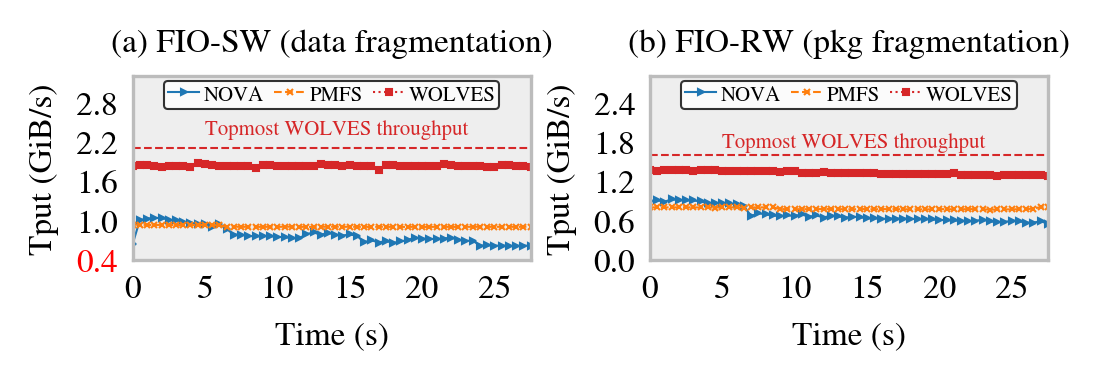

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
# with open("./performance-comparison-table-fsize", "r") as f:
#     df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# df.drop(df[df['file_system'] == "PMM"].index, inplace=True)

fss = ["NOVA", "WINEFS", "KILLER"]

bws_array = []
lat_array = []

for fs in fss:
    with open(f"./seq-{fs}_bw.1.log", "r") as f:
        df = pd.read_csv(f, index_col=None, engine='python', header=None, sep=', ')
        # extract the second column
        bws = df.iloc[:, 1].values
        bws = [float(bw) / 1024 / 1024 for bw in bws]
        bws_array.append(bws)
    with open(f"./rand-{fs}_bw.1.log", "r") as f:
        df = pd.read_csv(f, index_col=None, engine='python', header=None, sep=', ')
        # extract the second column
        bws = df.iloc[:, 1].values
        # lats = [float(lat / 1000) for lat in lats]
        bws = [float(bw) / 1024 / 1024 for bw in bws]
        lat_array.append(bws)

# extend NOVA array to the same size as others with the last 10 values
extend_bws = bws_array[0][-8:] * ((len(bws_array[1]) - len(bws_array[0])) // 8)
extend_lats = lat_array[0][-8:] * ((len(lat_array[1]) - len(lat_array[0])) // 8)
bws_array[0].extend(extend_bws)
lat_array[0].extend(extend_lats)

bws_array[0] = bws_array[0][:120]
bws_array[1] = bws_array[1][:120]
lat_array[0] = lat_array[0][:120]
lat_array[1] = lat_array[1][:120]
 
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)

gs0 = gridspec.GridSpec(1, 2, hspace=0)
for array_idx, array in enumerate([bws_array, lat_array]):
    lines = []
    cmap = "tab10"
    # gs0_fid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[array_idx], width_ratios=[6, 1], wspace=0.05)
    # ax_left = plt.subplot(gs0_fid[0])
    # ax_right = plt.subplot(gs0_fid[1])
    ax = fig.add_subplot(1, 2, array_idx + 1)
    for idx, fs in enumerate(fss):
        
        if fs == "PMM":
            continue
        bws = array[idx]
        if idx > 1:
            color_idx = idx + 1
        else:
            color_idx = idx
        if array_idx == 1:
            bws = bws[1:-1]
        print(bws)
        # if fs == "PMFS":
        #     line, = ax.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1, markeredgewidth=0.5, linestyle=line_types[color_idx], zorder=10)
        # else:
        line, = ax.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1.5, markeredgewidth=0.5, linestyle=line_types[color_idx])
        
        if fs == "KILLER" and array_idx == 0:
            ax.hlines(y=2.1, xmin=0, xmax=len(bws), color=plt.get_cmap(cmap)(color_idx), linestyle='--', linewidth=0.5)
            ax.text(10, 2.4, "Topmost WOLVES throughput", fontsize=5, color=plt.get_cmap(cmap)(color_idx), ha='left', va='center')
        if fs == "KILLER" and array_idx == 1:
            ax.hlines(y=1.6, xmin=0, xmax=len(bws), color=plt.get_cmap(cmap)(color_idx), linestyle='--', linewidth=0.5)
            ax.text(10, 1.8, "Topmost WOLVES throughput", fontsize=5, color=plt.get_cmap(cmap)(color_idx), ha='left', va='center')
            # ax.hlines(y=1.6, xmin=0, xmax=len(bws), color="lightgray", linestyle='--', linewidth=0.5)
            
        # line, = ax_right.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1.5, markeredgewidth=0.5, linestyle=line_types[color_idx])
        lines.append(line)
        
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if op_idx == 0 or op_idx == 1:
    #     plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    ax.set_title("(a) FIO-SW (data fragmentation)" if array_idx == 0 else "(b) FIO-RW (pkg fragmentation)", fontsize=8, loc='center')
    # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    
    ax.set_xticks([0, 10, 20, 30, 40, 50])
    ax.set_xlim(0, 55)
    # ax_right.set_xlim(105, 130)
    # ax_right.set_xticks([105, 120])

    ax.set_xticklabels([0, 5, 10, 15, 20, 25], fontsize=8)
    # ax_right.set_xticklabels(["", 60], fontsize=8)

    ax.set_xlabel("Time (s)", fontsize=8)
    _fss= ["NOVA", "PMFS", "WOLVES"]
    if array_idx == 0:
        # ax.set_ylim(0, 2.2)
        # # ax_right.set_ylim(0, 2.5)
        # ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
        # ax.set_yticklabels([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4], fontsize=8)
        ax.set_ylim(0.4, 3.2)
        # ax_right.set_ylim(0, 10)
        
        ax.set_yticks(np.linspace(0.4, 2.8, 5))
        ax.set_yticklabels(["0.4", "1.0", "1.6", "2.2", "2.8"], fontsize=8)
        # ax_right.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
        # ax_right.set_yticklabels([])
        ax.set_ylabel('Tput (GiB/s)', fontsize=8)
        ax.get_yticklabels()[0].set_color('red')

        start = 0
        end = 3
        # fss = ["NOVA", "PMFS", "KILLER", "SplitFS"]
        leg = ax.legend(lines[start : end], _fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=3, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

    else:
        ax.set_ylim(0, 2.8)
        # ax_right.set_ylim(0, 10)
        
        ax.set_yticks(np.linspace(0, 2.4, 5))
        ax.set_yticklabels(["0.0", "0.6", "1.2", "1.8", "2.4"], fontsize=8)
        # ax.set_ylim(0, 8)
        # # ax_right.set_ylim(0, 10)
        # ax.set_yticks(np.linspace(0,8, 5))
        # ax.set_yticklabels(np.linspace(0, 8, 5), fontsize=8)
        # ax_right.set_yticks(np.linspace(0, 9, 7))
        # ax_right.set_yticklabels([])
        ax.set_ylabel('Tput (GiB/s)', fontsize=8)

        start = 0
        end = 3
        # fss = ["NOVA", "PMFS", "KILLER", "SplitFS"]
        leg = ax.legend(lines[start : end], _fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=3, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

    frame = leg.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')

    
# plt.xlabel("Time (s)", fontsize=8) 
# fss.replace("SplitFS-FIO", "SplitFS", inplace=True)
# fig.legend(lines, fss, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
    
# fig.text(0.5, -0.05, "Time (s)", size=8, va='center', ha='center')
plt.tight_layout(rect=[0, 0, 1, 1], pad=0.4)
# plt.tight_layout(pad=0.4)

# gs0.tight_layout(fig)
plt.savefig("./FIG-Aging.pdf", bbox_inches='tight', pad_inches=0)


# CDF

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[1.0050125122070312, 1.0289688110351562, 1.0376129150390625, 1.0412368774414062, 1.0106353759765625, 1.00115966796875, 0.9775314331054688, 0.9682998657226562, 0.942352294921875, 0.9538803100585938, 0.9059677124023438, 0.9415206909179688, 0.8709335327148438, 0.7844161987304688, 0.7841720581054688, 0.7649688720703125, 0.7574081420898438, 0.7635421752929688, 0.7625579833984375, 0.748809814453125, 0.747406005859375, 0.7311172485351562, 0.7306900024414062, 0.7877655029296875, 0.8203811645507812, 0.7805023193359375, 0.8126449584960938, 0.7856826782226562, 0.769561767578125, 0.7872161865234375, 0.7686767578125, 0.666259765625, 0.6996841430664062, 0.6638336181640625, 0.6896820068359375, 0.6560211181640625, 0.6798629760742188, 0.700653076171875, 0.7404098510742188, 0.721435546875, 0.7203140258789062, 0.7165985107421875, 0.7248458862304688, 0.73828125, 0.7098312377929688, 0.6878509521484375, 0.6941146850585938, 0.615234375, 0.6224746704101562, 0.614837646484375, 0.6165008544921875, 0.61179351806

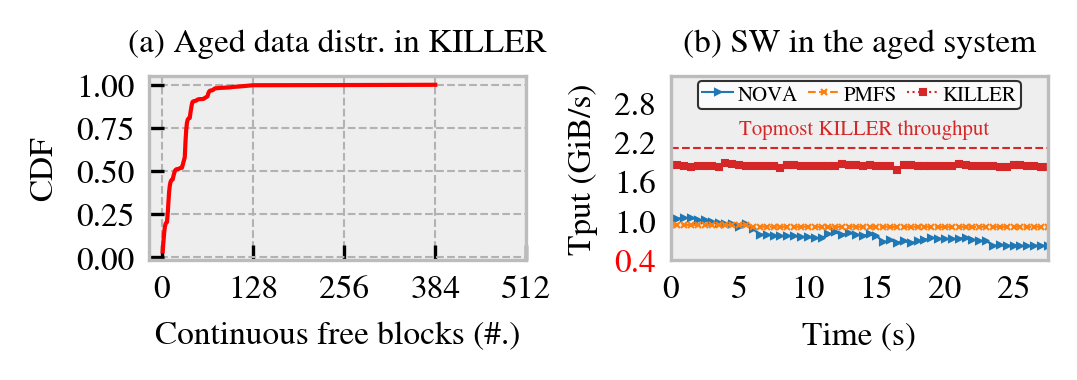

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
# with open("./performance-comparison-table-fsize", "r") as f:
#     df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# df.drop(df[df['file_system'] == "PMM"].index, inplace=True)

fss = ["NOVA", "WINEFS","KILLER"]

bws_array = []
lat_array = []

for fs in fss:
    with open(f"./{fs}_bw.1.log", "r") as f:
        df = pd.read_csv(f, index_col=None, engine='python', header=None, sep=', ')
        # extract the second column
        bws = df.iloc[:, 1].values
        bws = [float(bw) / 1024 / 1024 for bw in bws]
        bws_array.append(bws)
    with open(f"./{fs}_lat.1.log", "r") as f:
        df = pd.read_csv(f, index_col=None, engine='python', header=None, sep=', ')
        # extract the second column
        lats = df.iloc[:, 1].values
        lats = [float(lat / 1000) for lat in lats]
        lat_array.append(lats)

# extend NOVA array to the same size as others with the last 10 values
extend_bws = bws_array[0][-8:] * ((len(bws_array[1]) - len(bws_array[0])) // 8)
extend_lats = lat_array[0][-8:] * ((len(lat_array[1]) - len(lat_array[0])) // 8)
bws_array[0].extend(extend_bws)
lat_array[0].extend(extend_lats)

bws_array[0] = bws_array[0][:120]
bws_array[1] = bws_array[1][:120]
lat_array[0] = lat_array[0][:120]
lat_array[1] = lat_array[1][:120]
 
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)

# gs0 = gridspec.GridSpec(1, 2, hspace=0)
#!/usr/bin/env python3

output="""
data_locality[1]: 0.0339286
data_locality[2]: 0.0553594
data_locality[3]: 0.0516286
data_locality[4]: 0.035037
data_locality[5]: 0.0176691
data_locality[6]: 0.00750794
data_locality[7]: 0.00321714
data_locality[8]: 0.0477665
data_locality[9]: 0.0667372
data_locality[10]: 0.0606737
data_locality[11]: 0.0375551
data_locality[12]: 0.0195577
data_locality[13]: 0.00943899
data_locality[14]: 0.00351452
data_locality[15]: 0.00156415
data_locality[16]: 0.0188471
data_locality[17]: 0.01602
data_locality[18]: 0.013556
data_locality[19]: 0.00689772
data_locality[20]: 0.00332141
data_locality[21]: 0.00137877
data_locality[22]: 0.000339865
data_locality[23]: 0.000355314
data_locality[24]: 0.00231726
data_locality[25]: 0.00212416
data_locality[26]: 0.0020083
data_locality[27]: 0.000417108
data_locality[28]: 0.000108139
data_locality[32]: 0.0615465
data_locality[33]: 0.0887049
data_locality[34]: 0.0690699
data_locality[35]: 0.0394707
data_locality[36]: 0.0190479
data_locality[37]: 0.0071449
data_locality[38]: 0.00352224
data_locality[39]: 0.000301244
data_locality[40]: 0.0307424
data_locality[41]: 0.0256521
data_locality[42]: 0.0240069
data_locality[43]: 0.0131196
data_locality[44]: 0.00271892
data_locality[45]: 0.00139036
data_locality[46]: 0.000710628
data_locality[48]: 0.00240996
data_locality[49]: 0.00302789
data_locality[50]: 0.00308969
data_locality[51]: 0.000984837
data_locality[52]: 0.00100415
data_locality[53]: 0.000409383
data_locality[56]: 0.000432556
data_locality[57]: 0.00022014
data_locality[58]: 0.000224002
data_locality[64]: 0.0158192
data_locality[65]: 0.0160664
data_locality[66]: 0.00943127
data_locality[67]: 0.00569275
data_locality[68]: 0.00157574
data_locality[69]: 0.00106594
data_locality[70]: 0.000270348
data_locality[72]: 0.00333686
data_locality[73]: 0.00422901
data_locality[74]: 0.00257216
data_locality[75]: 0.00202761
data_locality[77]: 0.000297382
data_locality[81]: 0.00156415
data_locality[83]: 0.00064111
data_locality[85]: 0.000328279
data_locality[96]: 0.00222457
data_locality[97]: 0.00112387
data_locality[98]: 0.000756973
data_locality[100]: 0.000772421
data_locality[104]: 0.00120498
data_locality[105]: 0.000405521
data_locality[107]: 0.000413245
data_locality[128]: 0.0079096
data_locality[256]: 0.000988699
data_locality[384]: 0.00148305
"""

ax = fig.add_subplot(1, 2, 1)
# draw cdf of data_locality
data = {}
for line in output.split("\n"):
    if not line:
        continue
    key, value = line.split(":")
    data[int(key.split("[")[1].split("]")[0])] = float(value)

sorted_data = sorted(data.items(), key=lambda x: x[0])
x = [x[0] for x in sorted_data]
y = [y[1] for y in sorted_data]
cdf = np.cumsum(y)

plt.plot(x, cdf, color="red", linewidth=1)
plt.xlabel("Continuous free blocks (#.)", fontsize=8)
plt.ylabel("CDF",  fontsize=8)
plt.title("(a) Aged data distr. in KILLER",  fontsize=8)
plt.xticks(np.linspace(0, 512, 5), fontsize=8)
plt.yticks(np.linspace(0, 1, 5), fontsize=8)

plt.rcParams["axes.grid"] = False
for array_idx, array in enumerate([bws_array, bws_array]):
    if array_idx == 0:
        continue
    lines = []
    cmap = "tab10"
    # gs0_fid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[array_idx], width_ratios=[6, 1], wspace=0.05)
    # ax_left = plt.subplot(gs0_fid[0])
    # ax_right = plt.subplot(gs0_fid[1])
    ax = fig.add_subplot(1, 2, array_idx + 1)
    for idx, fs in enumerate(fss):
        
        if fs == "PMM":
            continue
        bws = array[idx]
        if idx > 1:
            color_idx = idx + 1
        else:
            color_idx = idx
        if array_idx == 1:
            bws = bws[1:-1]
        print(bws)
        # if fs == "PMFS":
        #     line, = ax.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1, markeredgewidth=0.5, linestyle=line_types[color_idx], zorder=10)
        # else:
        line, = ax.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1.5, markeredgewidth=0.5, linestyle=line_types[color_idx])
        
        if fs == "KILLER" and array_idx == 1:
            ax.hlines(y=2.1, xmin=0, xmax=len(bws), color=plt.get_cmap(cmap)(color_idx), linestyle='--', linewidth=0.5)
            ax.text(10, 2.4, "Topmost KILLER throughput", fontsize=5, color=plt.get_cmap(cmap)(color_idx), ha='left', va='center')
            # ax.hlines(y=1.6, xmin=0, xmax=len(bws), color="lightgray", linestyle='--', linewidth=0.5)
            
        # line, = ax_right.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1.5, markeredgewidth=0.5, linestyle=line_types[color_idx])
        lines.append(line)
        
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if op_idx == 0 or op_idx == 1:
    #     plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    ax.set_title("(a) Throughput" if array_idx == 0 else "(b) SW in the aged system", fontsize=8, loc='center')
    # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    
    ax.set_xticks([0, 10, 20, 30, 40, 50])
    ax.set_xlim(0, 55)
    # ax_right.set_xlim(105, 130)
    # ax_right.set_xticks([105, 120])

    ax.set_xticklabels([0, 5, 10, 15, 20, 25], fontsize=8)
    # ax_right.set_xticklabels(["", 60], fontsize=8)

    ax.set_xlabel("Time (s)", fontsize=8)
    _fss= ["NOVA", "PMFS", "KILLER"]
    if array_idx == 1:
        # ax.set_ylim(0, 2.2)
        # # ax_right.set_ylim(0, 2.5)
        # ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
        # ax.set_yticklabels([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4], fontsize=8)
        ax.set_ylim(0.4, 3.2)
        # ax_right.set_ylim(0, 10)
        
        ax.set_yticks(np.linspace(0.4, 2.8, 5))
        ax.set_yticklabels(["0.4", "1.0", "1.6", "2.2", "2.8"], fontsize=8)
        # ax_right.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
        # ax_right.set_yticklabels([])
        ax.set_ylabel('Tput (GiB/s)', fontsize=8)
        ax.get_yticklabels()[0].set_color('red')

        start = 0
        end = 3
        # fss = ["NOVA", "PMFS", "KILLER", "SplitFS"]
        leg = ax.legend(lines[start : end], _fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=3, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

    else:
        ax.set_ylim(0, 8)
        # ax_right.set_ylim(0, 10)
        ax.set_yticks(np.linspace(0,8, 5))
        ax.set_yticklabels(np.linspace(0, 8, 5), fontsize=8)
        # ax_right.set_yticks(np.linspace(0, 9, 7))
        # ax_right.set_yticklabels([])
        ax.set_ylabel('Lat (us)', fontsize=8)

        start = 0
        end = 3
        # fss = ["NOVA", "PMFS", "KILLER", "SplitFS"]
        leg = ax.legend(lines[start : end], _fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=3, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

    frame = leg.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')

    
# plt.xlabel("Time (s)", fontsize=8) 
# fss.replace("SplitFS-FIO", "SplitFS", inplace=True)
# fig.legend(lines, fss, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
    
# fig.text(0.5, -0.05, "Time (s)", size=8, va='center', ha='center')
plt.tight_layout(rect=[0, 0, 1, 1], pad=0.4)
# plt.tight_layout(pad=0.4)

# gs0.tight_layout(fig)
plt.savefig("./FIG-Aging.pdf", bbox_inches='tight', pad_inches=0)


# Bar

[1.0789308547973633, 1.0454483032226562, 1.03131103515625, 1.0033187866210938, 0.9862899780273438, 0.9743499755859375, 0.9524154663085938, 0.9343032836914062, 0.9113998413085938, 0.885833740234375, 0.8843307495117188, 0.8622665405273438, 0.8640365600585938, 0.8424606323242188, 0.8343887329101562, 0.849334716796875, 0.80328369140625, 0.8029708862304688, 0.7955703735351562, 0.7922286987304688, 0.750091552734375, 0.73828125, 0.73828125, 0.7408294677734375, 0.7357330322265625, 0.7064361572265625, 0.6015701293945312, 0.5951766967773438, 0.5788040161132812, 0.5941848754882812, 0.615234375, 0.615234375, 0.686981201171875, 0.666534423828125, 0.615234375, 0.6789016723632812, 0.64080810546875, 0.5259857177734375, 0.5973281860351562, 0.5183258056640625, 0.5753860473632812, 0.5238037109375, 0.5475616455078125, 0.5598602294921875, 0.4921875, 0.5491943359375, 0.5499649047851562, 0.5004501342773438, 0.49803924560546875, 0.5356903076171875, 0.5216064453125, 0.5264358520507812, 0.5022048950195312, 0.49

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


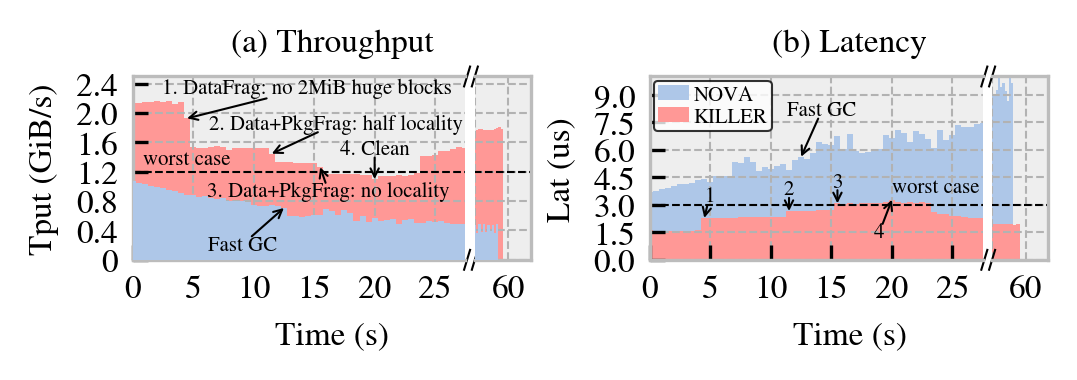

In [31]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
# with open("./performance-comparison-table-fsize", "r") as f:
#     df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# df.drop(df[df['file_system'] == "PMM"].index, inplace=True)

fss = ["NOVA","KILLER"]

bws_array = []
lat_array = []

for fs in fss:
    with open(f"./{fs}_bw.1.log", "r") as f:
        df = pd.read_csv(f, index_col=None, engine='python', header=None, sep=', ')
        # extract the second column
        bws = df.iloc[:, 1].values
        bws = [float(bw) / 1024 / 1024 for bw in bws]
        bws_array.append(bws)
    with open(f"./{fs}_lat.1.log", "r") as f:
        df = pd.read_csv(f, index_col=None, engine='python', header=None, sep=', ')
        # extract the second column
        lats = df.iloc[:, 1].values
        lats = [float(lat / 1000) for lat in lats]
        lat_array.append(lats)

# extend NOVA array to the same size as others with the last 10 values
extend_bws = bws_array[0][-8:] * ((len(bws_array[1]) - len(bws_array[0])) // 8)
extend_lats = lat_array[0][-8:] * ((len(lat_array[1]) - len(lat_array[0])) // 8)
bws_array[0].extend(extend_bws)
lat_array[0].extend(extend_lats)

bws_array[0] = bws_array[0][:120]
bws_array[1] = bws_array[1][:120]
lat_array[0] = lat_array[0][:120]
lat_array[1] = lat_array[1][:120]
 
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)

gs0 = gridspec.GridSpec(1, 2, hspace=0)
for array_idx, array in enumerate([bws_array, lat_array]):
    lines = []
    cmap = "tab20"
    gs0_fid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[array_idx], width_ratios=[6, 1], wspace=0.05)
    ax_left = plt.subplot(gs0_fid[0])
    ax_right = plt.subplot(gs0_fid[1])
    for idx, fs in enumerate(fss):
        
        if fs == "PMM":
            continue
        bws = array[idx]
        if idx > 0:
            color_idx = (idx + 2) * 2 + 1
        else:
            color_idx = idx + 1
        if array_idx == 1:
            bws = bws[1:-1]
        print(bws)
        # line, = ax_left.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1.5, markeredgewidth=0.5, linestyle=line_types[color_idx])
        
        # line, = ax_right.plot(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), markerfacecolor=plt.get_cmap(cmap)(color_idx), linewidth=line_width,label=fs, marker=marks[color_idx], markersize=1.5, markeredgewidth=0.5, linestyle=line_types[color_idx])
        if array_idx == 0 and fs == "NOVA":
            bar = ax_left.bar(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), label=fs, width=1, zorder=10)
            bar = ax_right.bar(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), label=fs, width=1, zorder=10)
        else:
            bar = ax_left.bar(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), label=fs, width=1)
            bar = ax_right.bar(range(len(bws)), bws, color=plt.get_cmap(cmap)(color_idx), label=fs, width=1)
            
        lines.append(bar)
        
        if array_idx == 0:
            if fs == "KILLER":
                # annotate the sixth point and 13th point with arrow
                ax_left.annotate(f'1. DataFrag: no 2MiB huge blocks', (9, bws[9]), textcoords="offset points", xytext=(-6, 6), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='left', fontsize=5, bbox=dict(boxstyle='square,pad=0', fc='none', ec='none'))
                
                ax_left.annotate(f'2. Data+PkgFrag: half locality', (23, bws[23]), textcoords="offset points", xytext=(-15, 6), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='left', fontsize=5, bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'))
                
                ax_left.annotate(f'3. Data+PkgFrag: no locality', (31, bws[31]), textcoords="offset points", xytext=(2, -7), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='center', fontsize=5, bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'))
                
                ax_left.annotate(f'4. Clean', (40, bws[40]), textcoords="offset points", xytext=(0, 6), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='center', fontsize=5, bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'), zorder=10)
                
                
                ax_left.hlines(y=1.2, xmin=0, xmax=55, color='k', linestyle='--', linewidth=0.5)
                
                ax_right.hlines(y=1.2, xmin=0, xmax=130, color='k', linestyle='--', linewidth=0.5)
                
                ax_left.text(9, 1.3, "worst case", fontsize=5, color='k', ha='center')
                
            else:
                ax_left.annotate(f'Fast GC', (25, bws[25]), textcoords="offset points", xytext=(-10, -10), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='center', fontsize=5, bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'), zorder=11)
        else:
            if fs == "KILLER":
                # annotate the sixth point and 13th point with arrow
                ax_left.annotate(f'1', (9, bws[9]), textcoords="offset points", xytext=(0, 4), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='left', fontsize=5, bbox=dict(boxstyle='square,pad=0', fc='none', ec='none'))
                
                ax_left.annotate(f'2', (23, bws[23]), textcoords="offset points", xytext=(0, 4), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='center', fontsize=5, bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'))
                
                ax_left.annotate(f'3', (31, bws[31]), textcoords="offset points", xytext=(0, 4), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='center', fontsize=5, bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'))
                
                ax_left.annotate(f'4', (40, bws[40]), textcoords="offset points", xytext=(-3, -9), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='center', fontsize=5, bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'), zorder=10)
                
                ax_left.hlines(y=3, xmin=0, xmax=55, color='k', linestyle='--', linewidth=0.5)
                
                ax_right.hlines(y=3, xmin=0, xmax=130, color='k', linestyle='--', linewidth=0.5)
                
                ax_left.text(40, 3.7, "worst case", fontsize=5, color='k')
            else:
                ax_left.annotate(f'Fast GC', (25, bws[25]), textcoords="offset points", xytext=(5, 10), arrowprops=dict(arrowstyle="->", color="k", shrinkA=0, shrinkB=0), ha='center', fontsize=5, bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'))
    d1 = .009
    d2 = .009 * 6
    kwargs = dict(transform=ax_left.transAxes, color='k', clip_on=False, linewidth=0.5)
    # 前面括号是x值，后面的是y值
    # 0.005是右移动补丁
    ax_left.plot((1+0.005-d1, 1+0.005+d1), (1-d1*6, 1+d1*6), **kwargs)        
    ax_left.plot((1+0.005-d1, 1+0.005+d1), (-d1*6, + d1*6), **kwargs)  

    kwargs.update(transform=ax_right.transAxes)
    # ax_right.plot((-d2, +d2), (1 - d2*2, 1 + d2*2), **kwargs)  
    # ax_right.plot((-d2, +d2), (-d2*2, +d2*2), **kwargs) 
    ax_right.plot((-d2-0.005, +d2-0.005), (1-d2*1, 1+d2*1), **kwargs)  
    ax_right.plot((-d2-0.005, +d2-0.005), (-d2*1, +d2*1), **kwargs)  

    ax_left.spines['right'].set_visible(False)
    ax_right.spines['left'].set_visible(False)
    # ax = fig.gca()
    # lw = 0.5
    # for axis in ['top','bottom','left','right']:
    #     lef.spines[axis].set_linewidth(lw)
    # plt.xticks([1024, 8192, 16384, 24576, 32768], labels=[1, 8, 16, 24, 32], fontsize=8)
    ax_right.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if op_idx == 0 or op_idx == 1:
    #     plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    ax_left.set_title("(a) Throughput" if array_idx == 0 else "(b) Latency", fontsize=8, loc='center', x=0.6)
    # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    
    ax_left.set_xticks([0, 10, 20, 30, 40, 50])
    ax_left.set_xlim(0, 55)
    ax_right.set_xlim(105, 130)
    ax_right.set_xticks([105, 120])

    ax_left.set_xticklabels([0, 5, 10, 15, 20, 25], fontsize=8)
    ax_right.set_xticklabels(["", 60], fontsize=8)

    ax_left.set_xlabel("Time (s)", fontsize=8, x=0.6)
        
    if array_idx == 0:
        ax_left.set_ylim(0, 2.5)
        ax_right.set_ylim(0, 2.5)
        ax_left.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
        ax_left.set_yticklabels([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4], fontsize=8)
        ax_right.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
        ax_right.set_yticklabels([])
        ax_left.set_ylabel('Tput (GiB/s)', fontsize=8)


    else:
        ax_left.set_ylim(0, 10)
        ax_right.set_ylim(0, 10)
        ax_left.set_yticks(np.linspace(0, 9, 7))
        ax_left.set_yticklabels(np.linspace(0, 9, 7), fontsize=8)
        ax_right.set_yticks(np.linspace(0, 9, 7))
        ax_right.set_yticklabels([])
        ax_left.set_ylabel('Lat (us)', fontsize=8)

        start = 0
        end = 4
        # fss = ["NOVA", "PMFS", "KILLER", "SplitFS"]
        leg = ax_left.legend(lines[start : end], fss[start : end], loc='upper left', bbox_to_anchor=(0,0,1,1), bbox_transform=ax_left.transAxes, ncol=1, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

        frame = leg.get_frame()
        frame.set_facecolor('white')
        frame.set_edgecolor('black')

    
# plt.xlabel("Time (s)", fontsize=8) 
# fss.replace("SplitFS-FIO", "SplitFS", inplace=True)
# fig.legend(lines, fss, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
    
# fig.text(0.5, -0.05, "Time (s)", size=8, va='center', ha='center')
gs0.tight_layout(fig, rect=[0, 0, 1, 1], pad=0.4)
# plt.tight_layout(pad=0.4)

# gs0.tight_layout(fig)
plt.savefig("./FIG-Aging.pdf", bbox_inches='tight', pad_inches=0)
